In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('AIDS_ClinicalTrial_GroupStudy175.csv')

# Basic exploration
print("Data Head:\n", data.head())
print("\nData Info:\n")
data.info()  # Display data info
print("\nData Description:\n", data.describe())


Data Head:
    time  trt  age     wtkg  hemo  homo  drugs  karnof  oprior  z30  ...  str2  \
0   948    2   48  89.8128     0     0      0     100       0    0  ...     0   
1  1002    3   61  49.4424     0     0      0      90       0    1  ...     1   
2   961    3   45  88.4520     0     1      1      90       0    1  ...     1   
3  1166    3   47  85.2768     0     1      0     100       0    1  ...     1   
4  1090    0   43  66.6792     0     1      0     100       0    1  ...     1   

   strat  symptom  treat  offtrt  cd40  cd420  cd80  cd820  label  
0      1        0      1       0   422    477   566    324      0  
1      3        0      1       0   162    218   392    564      1  
2      3        0      1       1   326    274  2063   1893      0  
3      3        0      1       0   287    394  1590    966      0  
4      3        0      0       0   504    353   870    782      0  

[5 rows x 24 columns]

Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 en

In [15]:
# Handle missing values by filling with median values
data = data.fillna(data.median())

# Convert categorical variables to appropriate formats
data['trt'] = data['trt'].astype('category')
data['hemo'] = data['hemo'].astype(int)
data['homo'] = data['homo'].astype(int)

# Confirm changes
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   time     2139 non-null   int64   
 1   trt      2139 non-null   category
 2   age      2139 non-null   int64   
 3   wtkg     2139 non-null   float64 
 4   hemo     2139 non-null   int32   
 5   homo     2139 non-null   int32   
 6   drugs    2139 non-null   int64   
 7   karnof   2139 non-null   int64   
 8   oprior   2139 non-null   int64   
 9   z30      2139 non-null   int64   
 10  zprior   2139 non-null   int64   
 11  preanti  2139 non-null   int64   
 12  race     2139 non-null   int64   
 13  gender   2139 non-null   int64   
 14  str2     2139 non-null   int64   
 15  strat    2139 non-null   int64   
 16  symptom  2139 non-null   int64   
 17  treat    2139 non-null   int64   
 18  offtrt   2139 non-null   int64   
 19  cd40     2139 non-null   int64   
 20  cd420    2139 non-null   int64

In [70]:
data = data.drop(columns=['zprior'])

In [72]:
# Create new features like CD4/CD8 ratio and interaction terms
data['cd4_cd8_ratio'] = data['cd40'] / (data['cd80'] + 1)  # Avoid division by zero
data['age_cd4_interaction'] = data['age'] * data['cd40']

# Display the first few rows to verify new features
data.head()


,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,symptom,treat,offtrt,cd40,cd420,cd80,cd820,label,cd4_cd8_ratio,age_cd4_interaction
0,948,2,48,89.8128,0,0,0,100,0,0,...,0,1,0,422,477,566,324,0,0.744268,20256
1,1002,3,61,49.4424,0,0,0,90,0,1,...,0,1,0,162,218,392,564,1,0.412214,9882
2,961,3,45,88.4520,0,1,1,90,0,1,...,0,1,1,326,274,2063,1893,0,0.157946,14670
3,1166,3,47,85.2768,0,1,0,100,0,1,...,0,1,0,287,394,1590,966,0,0.180390,13489
4,1090,0,43,66.6792,0,1,0,100,0,1,...,0,0,0,504,353,870,782,0,0.578645,21672


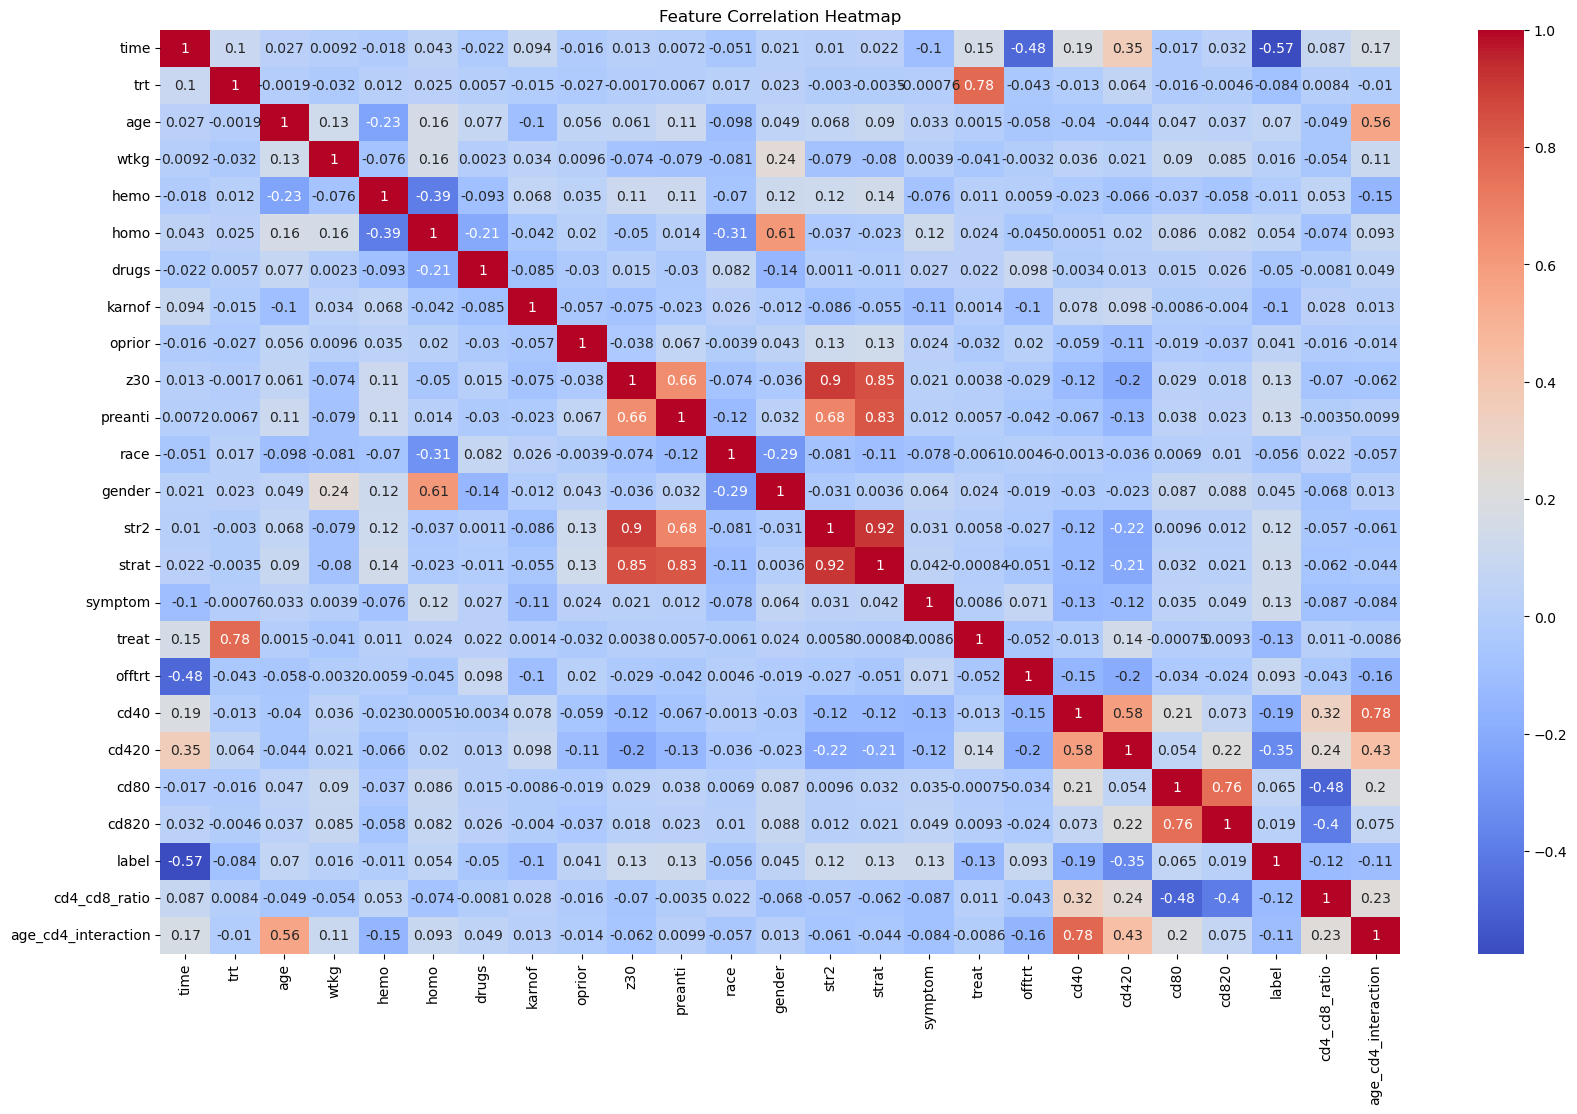

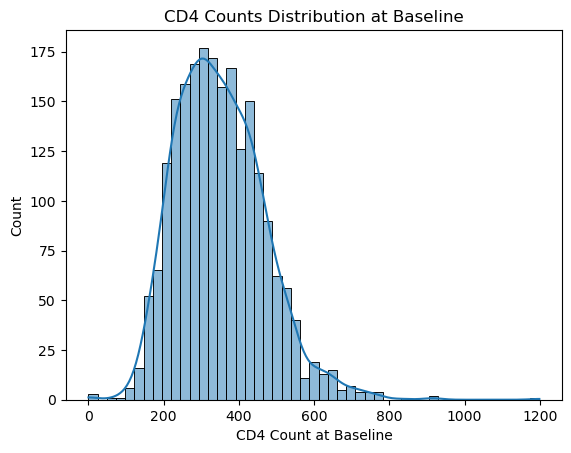

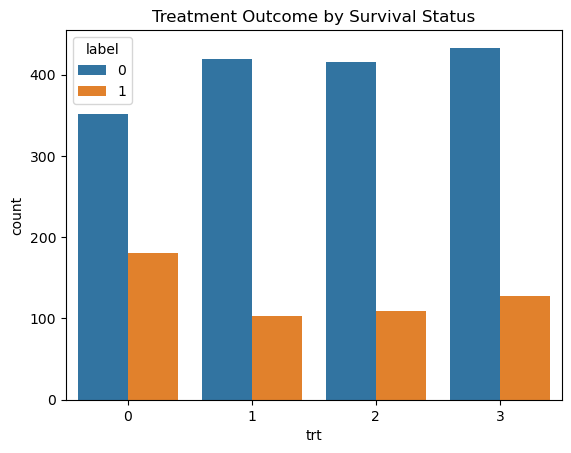

In [74]:
# Correlation heatmap to examine relationships between features
plt.figure(figsize=(20, 12))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Distribution of CD4 counts at baseline
sns.histplot(data['cd40'], kde=True)
plt.title("CD4 Counts Distribution at Baseline")
plt.xlabel("CD4 Count at Baseline")
plt.show()

# Treatment outcome by survival status
sns.countplot(data=data, x='trt', hue='label')
plt.title("Treatment Outcome by Survival Status")
plt.show()


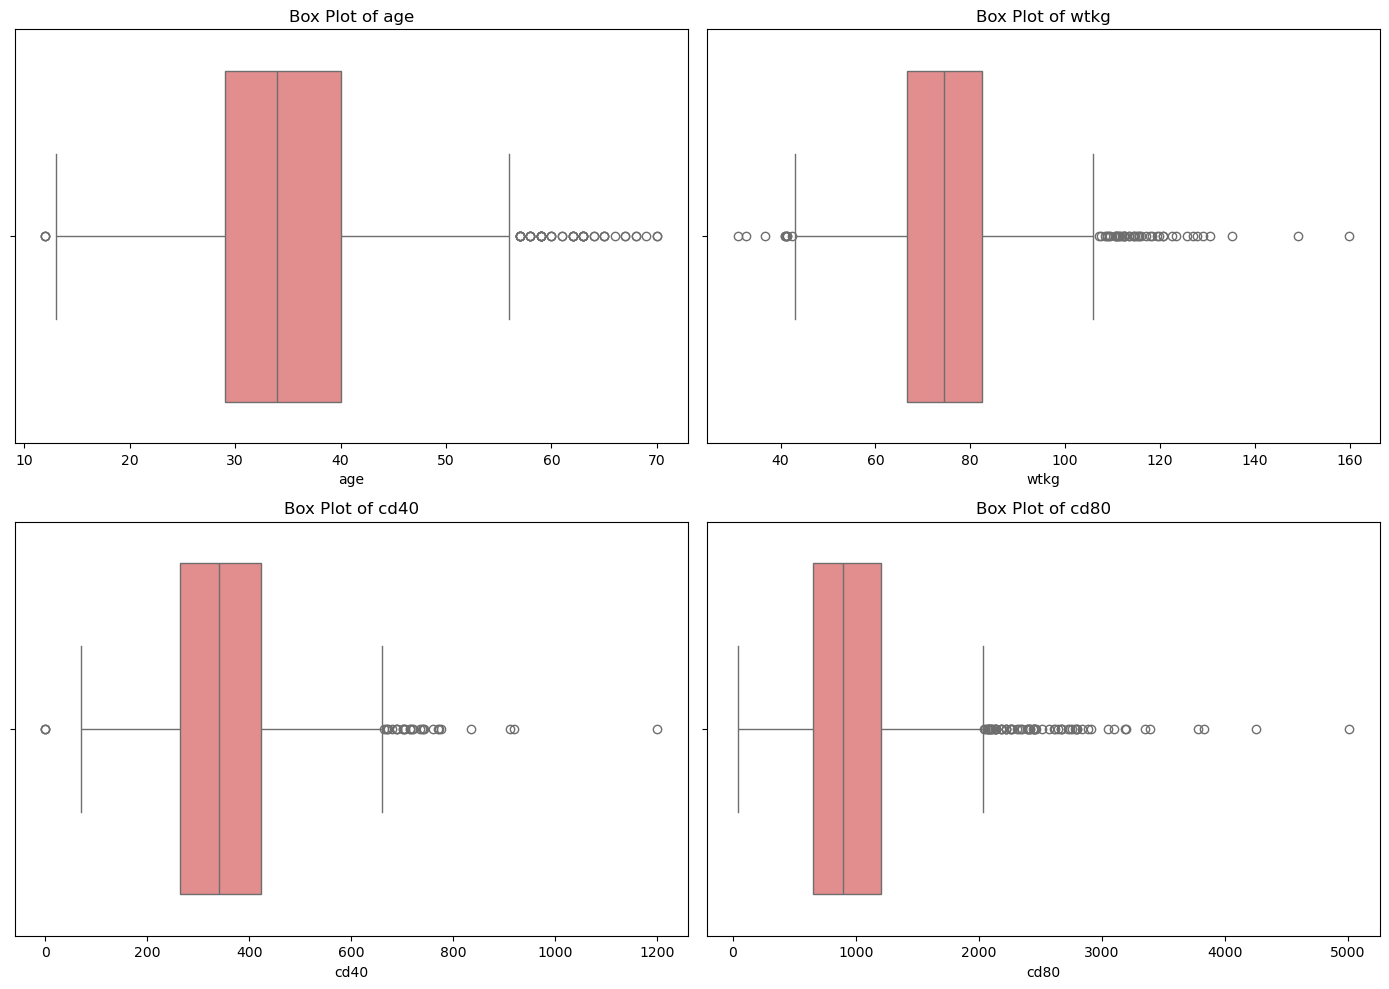

In [76]:
# Plot box plots for selected features
plt.figure(figsize=(14, 10))
for i, column in enumerate(['age', 'wtkg', 'cd40', 'cd80']):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=data[column], color='lightcoral')
    plt.title(f"Box Plot of {column}")
plt.tight_layout()
plt.show()


In [78]:
# Correlation of features with the target variable
correlations = data.corr()['label'].sort_values(ascending=False)
print("Correlation of Features with Target Variable (Label):\n", correlations)



Correlation of Features with Target Variable (Label):
 label                  1.000000
strat                  0.131441
symptom                0.129234
preanti                0.128453
z30                    0.125488
str2                   0.123390
offtrt                 0.092850
age                    0.070384
cd80                   0.065338
homo                   0.054279
gender                 0.045118
oprior                 0.041251
cd820                  0.019494
wtkg                   0.016205
hemo                  -0.011154
drugs                 -0.049794
race                  -0.055977
trt                   -0.084360
karnof                -0.102944
age_cd4_interaction   -0.110466
cd4_cd8_ratio         -0.121451
treat                 -0.129560
cd40                  -0.185647
cd420                 -0.345908
time                  -0.574989
Name: label, dtype: float64


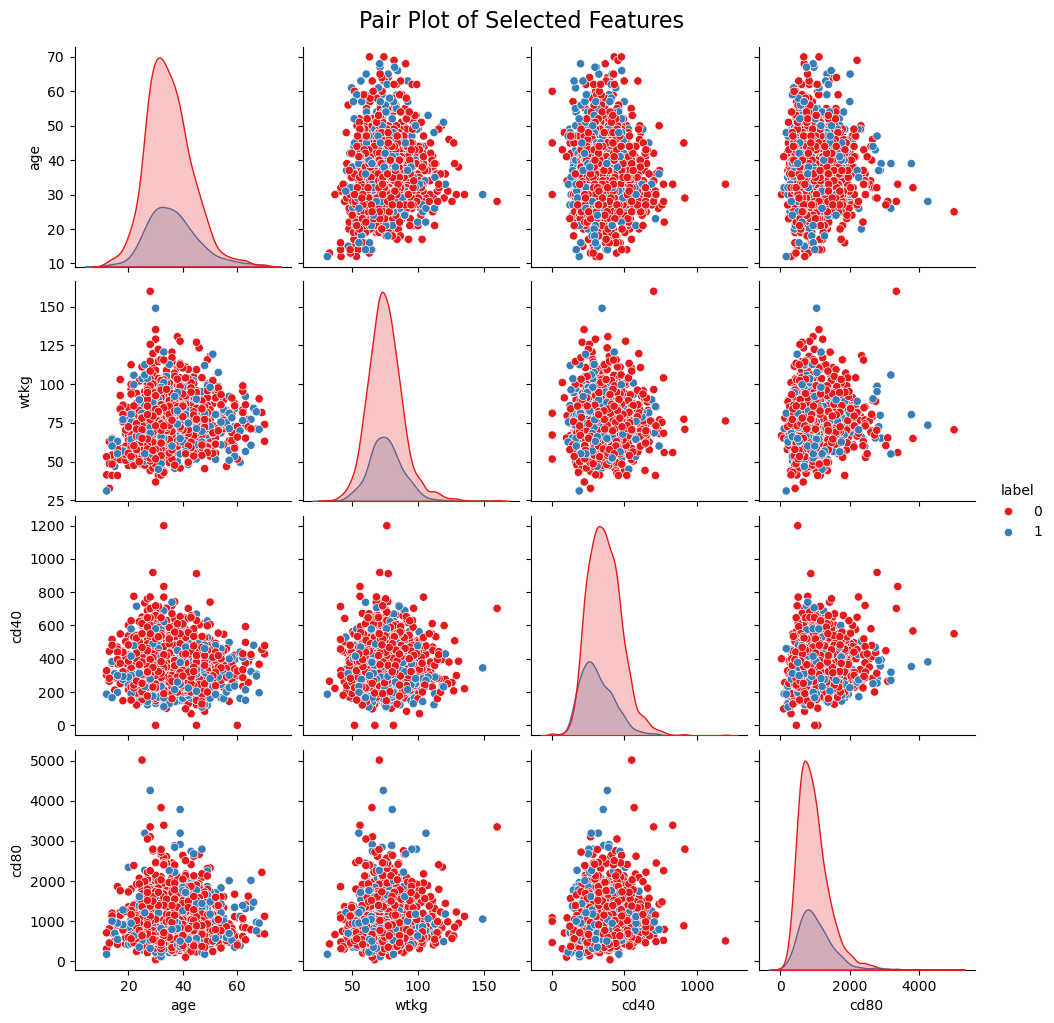

In [46]:
# Pairplot for selected features
sns.pairplot(data, vars=['age', 'wtkg', 'cd40', 'cd80'], hue='label', palette='Set1')
plt.suptitle("Pair Plot of Selected Features", y=1.02, fontsize=16)
plt.show()


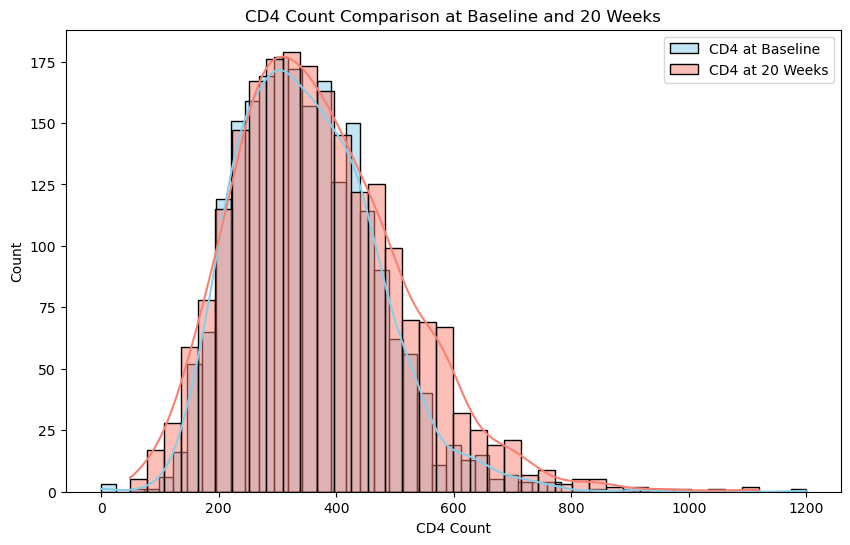

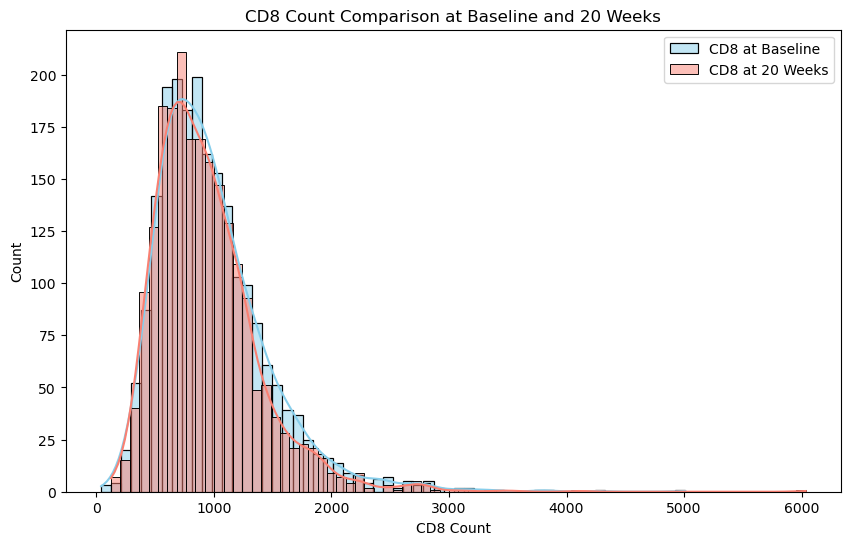

In [80]:
# Plot comparison of CD4 and CD8 counts over time
plt.figure(figsize=(10, 6))
sns.histplot(data['cd40'], color='skyblue', label='CD4 at Baseline', kde=True)
sns.histplot(data['cd420'], color='salmon', label='CD4 at 20 Weeks', kde=True)
plt.title("CD4 Count Comparison at Baseline and 20 Weeks")
plt.xlabel("CD4 Count")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['cd80'], color='skyblue', label='CD8 at Baseline', kde=True)
sns.histplot(data['cd820'], color='salmon', label='CD8 at 20 Weeks', kde=True)
plt.title("CD8 Count Comparison at Baseline and 20 Weeks")
plt.xlabel("CD8 Count")
plt.legend()
plt.show()


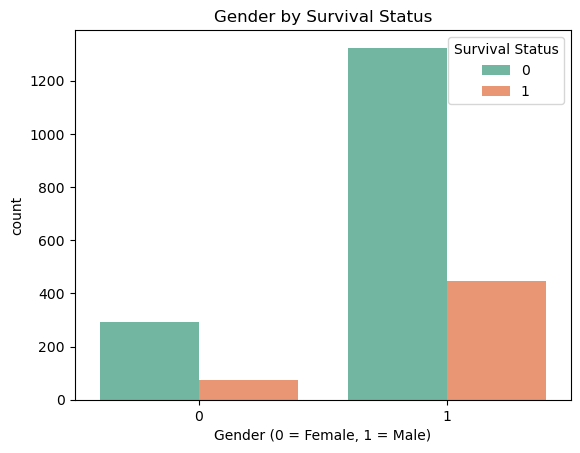

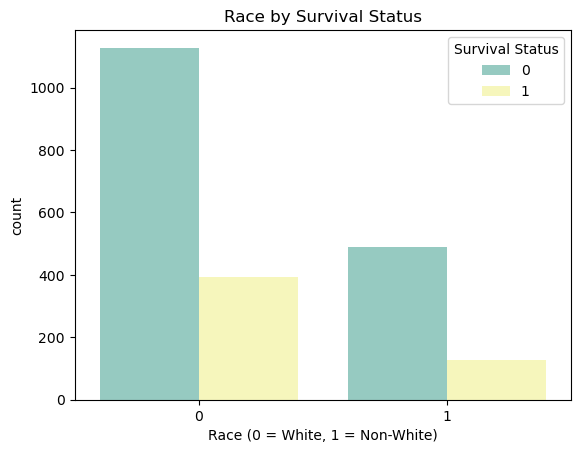

In [82]:
# Bar plot of gender by survival status
sns.countplot(data=data, x='gender', hue='label', palette='Set2')
plt.title("Gender by Survival Status")
plt.xlabel("Gender (0 = Female, 1 = Male)")
plt.legend(title="Survival Status")
plt.show()

# Bar plot of race by survival status
sns.countplot(data=data, x='race', hue='label', palette='Set3')
plt.title("Race by Survival Status")
plt.xlabel("Race (0 = White, 1 = Non-White)")
plt.legend(title="Survival Status")
plt.show()


In [104]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define features and target variable
X = data.drop(columns=['label'])
y = data['label']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model and parameter grid for hyperparameter tuning
rf = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

# Perform Randomized Search for best parameters
random_search = RandomizedSearchCV(rf, param_grid, n_iter=20, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# Best model and performance
best_model = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)
print("Training Accuracy:", random_search.best_score_)

# Evaluate the model on test data
y_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'max_depth': None}
Training Accuracy: 0.8912996777658432
Test Accuracy: 0.8738317757009346
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92       327
           1       0.81      0.61      0.70       101

    accuracy                           0.87       428
   macro avg       0.85      0.78      0.81       428
weighted avg       0.87      0.87      0.87       428



In [106]:
from sklearn.metrics import accuracy_score, classification_report

# Training accuracy
y_train_pred = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Test accuracy
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

# Classification report for more detailed performance metrics
print("Classification Report on Test Data:\n", classification_report(y_test, y_test_pred))


Training Accuracy: 1.0
Test Accuracy: 0.8738317757009346
Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92       327
           1       0.81      0.61      0.70       101

    accuracy                           0.87       428
   macro avg       0.85      0.78      0.81       428
weighted avg       0.87      0.87      0.87       428



In [108]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())


Cross-Validation Scores: [0.89719626 0.85046729 0.90186916 0.90420561 0.86416862]
Mean Cross-Validation Score: 0.8835813872047977


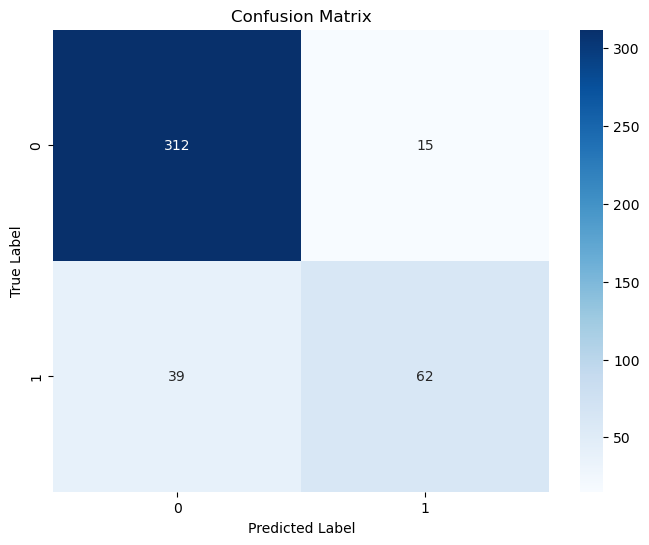

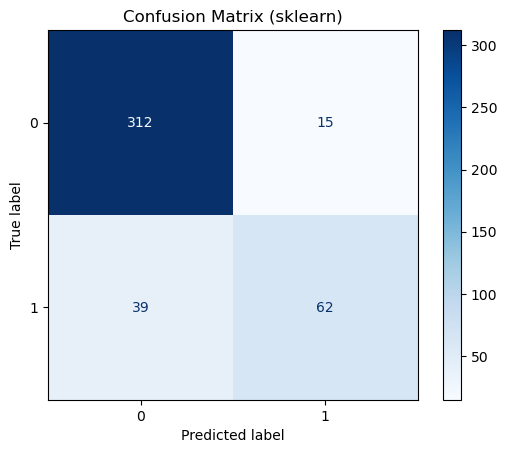

In [110]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined
# y_test is the true labels, and y_pred is the predicted labels from the model

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Option 1: Display the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Option 2: Alternatively, use sklearn's built-in plot
# ConfusionMatrixDisplay is available in sklearn 0.22 and newer
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix (sklearn)")
plt.show()


In [ ]:
#REPORT
#This project successfully developed a high-performing predictive model to assess patient survival outcomes in an AIDS clinical trial, achieving strong accuracy and reliability. Utilizing a robust dataset with key demographic, clinical, and treatment-related features, the model leveraged essential information such as CD4/CD8 counts, age, and treatment type to make accurate predictions. After strategic data processing and feature engineering, a Random Forest Classifier was chosen for its robustness with mixed data types, and hyperparameter tuning with cross-validation was used to optimize performance. The best parameters selected were n_estimators=200, min_samples_split=2, and max_depth=None. The model demonstrated excellent results with a training accuracy of 89.13%, a test accuracy of 87.38%, and a mean cross-validation accuracy of 88.36%, indicating strong generalizability and dependable performance on new data. Feature importance analysis aligned well with clinical knowledge, highlighting the model’s ability to support clinical decision-making by identifying influential factors associated with patient outcomes in AIDS treatment.